In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df_proddetails = pd.read_csv('/Users/reenalboddul/Documents/HL Design/perf_test_orderdata/prod.csv')
df_order = pd.read_csv('/Users/reenalboddul/Documents/HL Design/perf_test_orderdata/orders_all.csv')
df_order_time = pd.read_csv('/Users/reenalboddul/Documents/HL Design/perf_test_orderdata/orders_times.csv')

/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,8,11,13,16,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pd.set_option('display.max_columns', None)
df_proddetails.head()

,currency_id,price_list_id,recommended_price_list_id,sales_ids.0,sales_ids.1,sales_ids.2,sales_ids.3,sales_ids.4,sales_ids.5,sales_ids.6,sales_ids.7,sales_ids.8,sales_ids.9,sales_ids.10,sales_ids.11,sales_ids.12,sales_ids.13,sales_ids.14,sales_ids.15,sales_ids.16,sales_ids.17,sales_ids.18,sales_ids.19,sales_ids.20,sales_ids.21,sales_ids.22,sales_ids.23,sales_ids.24,sales_ids.25,sales_ids.26,sales_ids.27,sales_ids.28,sales_ids.29,sales_ids.30,sales_ids.31,sales_ids.32,sales_ids.33,sales_ids.34,sales_ids.35,sales_ids.36,sales_ids.37,sales_ids.38,sales_ids.39,sales_ids.40,sales_ids.41,sales_ids.42,sales_ids.43,sales_ids.44,sales_ids.45,sales_ids.46,sales_ids.47,sales_ids.48,sales_ids.49,sales_ids.50,sales_ids.51,sales_ids.52,sales_ids.53,sales_ids.54,sales_ids.55,sales_ids.56,sales_ids.57,sales_ids.58,sales_ids.59,sales_ids.60,sales_ids.61,sales_ids.62,sales_ids.63,sales_ids.64,sales_ids.65,sales_ids.66,sales_ids.67,sales_ids.68,sales_ids.69,sales_ids.70,sales_ids.71,sales_ids.72,sales_ids.73,sales_ids.74,sales_ids.75,sales_ids.76,sales_ids.77,sales_ids.78,sales_ids.79,sales_ids.80,sales_ids.81,sales_ids.82,sales_ids.83,sales_ids.84,sales_ids.85,sales_ids.86,sales_ids.87,sales_ids.88,sales_ids.89,sales_ids.90,sales_ids.91,sales_ids.92,sales_ids.93,sales_ids.94,sales_ids.95,sales_ids.96,sales_ids.97,sales_ids.98,sales_ids.99,sales_ids.100,sales_ids.101,sales_ids.102,sales_ids.103,sales_ids.104,sales_ids.105,sales_ids.106,sales_ids.107,sales_ids.108,sales_ids.109,sales_ids.110,sales_ids.111,sales_ids.112,sales_ids.113,sales_ids.114,sales_ids.115,sales_ids.116,sales_ids.117,sales_ids.118,sales_ids.119,sales_ids.120,sales_ids.121,sales_ids.122,sales_ids.123,sales_ids.124,sales_ids.125,sales_ids.126,sales_ids.127,sales_ids.128,variants.0.id,variants.0.product_id,variants.0.sku,variants.0.ean,variants.0.is_master,variants.0.weight,variants.0.name,variants.0.reference,variants.0.source_owner,variants.0.source_id,variants.0.links.product.href,variants.0.current_price.id,variants.0.current_price.variant_id,variants.0.current_price.product_id,variants.0.current_price.currency_id,variants.0.current_price.price_list_id,variants.0.current_price.campaign_id,variants.0.current_price.customer_id,variants.0.current_price.discount_list_id,variants.0.current_price.builder_price_list_id,variants.0.current_price.include_tax,variants.0.current_price.staggered,variants.0.current_price.amount,variants.0.current_price.final_amount,variants.0.current_price.pre_tax_amount,variants.0.current_price.after_tax_amount,variants.0.current_price.discount,variants.0.current_price.discount_multiplier,variants.0.recommended_price,variants.0.sale_price,variants.0.best_price.id,variants.0.best_price.variant_id,variants.0.best_price.product_id,variants.0.best_price.currency_id,variants.0.best_price.price_list_id,variants.0.best_price.campaign_id,variants.0.best_price.customer_id,variants.0.best_price.discount_list_id,variants.0.best_price.builder_price_list_id,variants.0.best_price.include_tax,variants.0.best_price.staggered,variants.0.best_price.amount,variants.0.best_price.final_amount,variants.0.best_price.pre_tax_amount,variants.0.best_price.after_tax_amount,variants.0.best_price.discount,variants.0.best_price.discount_multiplier,variants.0.editables.0.id,variants.0.editables.0.saved_content.ingredients,variants.0.editables.0.published_content.name,variants.0.editables.0.published_content.ingredients,variants.0.editables.0.locale,variants.0.editables.1.id,variants.0.editables.1.saved_content.ingredients,variants.0.editables.1.published_content.name,variants.0.editables.1.published_content.ingredients,variants.0.editables.1.locale,variants.0.editables.2.id,variants.0.editables.2.saved_content.ingredients,variants.0.editables.2.published_content.name,variants.0.editables.2.published_content.ingredients,variants.0.editables.2.locale,variants.0.editables.3.id,variants.0.editables.3.saved_content.ingredients,variants.0.editables.3.published_content.name,variants.0.editab

In [4]:
df_order.head()

,admin_reference,subsite_store,completed_at,state,payment_state,shipment_state,total,currency,campaign_code,customer_company,bill_city,bill_zipcode,bill_state_name,bill_company,bill_country_iso_name,ship_city,ship_zipcode,ship_state_name,ship_company,ship_country_iso_name,product_name,quantity,sku
0,O340374775,NaN,NaN,complete,paid,shipped,169.00,SEK,NaN,NaN,Växjö,35230,NaN,NaN,SE,Växjö,35230,NaN,NaN,SE,RAW Energy - 24 st x 30 g,5,ATSNART76
1,O160651894,NaN,NaN,complete,paid,ready,97.21,NOK,NaN,NaN,Hafrsfjord,4048,NaN,NaN,NO,Hafrsfjord,4048,NaN,NaN,NO,AROMA Svartvinbärstoppar 900g,1,WEB7098
2,O160651894,NaN,NaN,complete,paid,ready,97.21,NOK,NaN,NaN,Hafrsfjord,4048,NaN,NaN,NO,Hafrsfjord,4048,NaN,NaN,NO,AROMA HALLON & LAKRITSBÅTAR 900G 2:a sor,1,WEB7080
3,O082676927,NaN,NaN,complete,paid,shipped,435.00,SEK,NaN,NaN,Vrigstad,57697,NaN,NaN,SE,Vrigstad,57697,NaN,NaN,SE,FREIA 43G MANDELSTANG x 30 st,1,KLIPP66654
4,O082676927,NaN,NaN,complete,paid,shipped,435.00,SEK,NaN,NaN,Vrigstad,57697,NaN,NaN,SE,Vrigstad,57697,NaN,NaN,SE,"DEVILS JORDGUBB/LAKRITS - 1,5 kg",1,GRA669


In [5]:
df_order_time.head()

,admin_reference,completed_at
0,O476965014,2021-05-05 08:28
1,O646889439,2021-05-04 07:33
2,O911497384,2021-05-04 07:31
3,O782331906,2021-05-04 07:30
4,O885566250,2021-05-04 07:26


In [6]:
print("proddetails columns")
print(df_proddetails.columns)
print("################################################")
print("order details columns")
print(df_order.columns)
print("################################################")
print("order time details")
print(df_order_time.columns)

proddetails columns
Index(['currency_id', 'price_list_id', 'recommended_price_list_id',
       'sales_ids.0', 'sales_ids.1', 'sales_ids.2', 'sales_ids.3',
       'sales_ids.4', 'sales_ids.5', 'sales_ids.6',
       ...
       'variants.0.groups.4.seo_description',
       'variants.0.groups.4.seo_keywords', 'variants.0.groups.4.visible',
       'variants.0.groups.4.published_content.sv.name',
       'variants.0.groups.4.published_content.sv.description',
       'variants.0.groups.4.tags_list', 'variants.0.groups.4.template_id',
       'variants.0.groups.4.template_name', 'variants.0.groups.4.created_at',
       'variants.0.groups.4.updated_at'],
      dtype='object', length=358)
################################################
order details columns
Index(['admin_reference', 'subsite_store', 'completed_at', 'state',
       'payment_state', 'shipment_state', 'total', 'currency', 'campaign_code',
       'customer_company', 'bill_city', 'bill_zipcode', 'bill_state_name',
       'bill_company

In [7]:
print("proddetails shape")
print(df_proddetails.shape)
print("################################################")
print("order details shape")
print(df_order.shape)
print("################################################")
print("order time shape")
print(df_order_time.shape)

proddetails shape
(1, 358)
################################################
order details shape
(886933, 23)
################################################
order time shape
(328884, 2)


In [8]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_order.columns if df_order[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_order[feature].isnull().mean(), 4),' % missing values')

subsite_store 0.7376  % missing values
completed_at 1.0  % missing values
shipment_state 0.0001  % missing values
campaign_code 0.999  % missing values
customer_company 1.0  % missing values
bill_city 0.0001  % missing values
bill_zipcode 0.0001  % missing values
bill_state_name 1.0  % missing values
bill_company 0.9978  % missing values
bill_country_iso_name 0.0001  % missing values
ship_city 0.0001  % missing values
ship_zipcode 0.0001  % missing values
ship_state_name 1.0  % missing values
ship_company 0.9978  % missing values
ship_country_iso_name 0.0001  % missing values
product_name 0.0  % missing values
sku 0.0  % missing values


In [9]:
df_proddetails.describe(include='all')

,currency_id,price_list_id,recommended_price_list_id,sales_ids.0,sales_ids.1,sales_ids.2,sales_ids.3,sales_ids.4,sales_ids.5,sales_ids.6,sales_ids.7,sales_ids.8,sales_ids.9,sales_ids.10,sales_ids.11,sales_ids.12,sales_ids.13,sales_ids.14,sales_ids.15,sales_ids.16,sales_ids.17,sales_ids.18,sales_ids.19,sales_ids.20,sales_ids.21,sales_ids.22,sales_ids.23,sales_ids.24,sales_ids.25,sales_ids.26,sales_ids.27,sales_ids.28,sales_ids.29,sales_ids.30,sales_ids.31,sales_ids.32,sales_ids.33,sales_ids.34,sales_ids.35,sales_ids.36,sales_ids.37,sales_ids.38,sales_ids.39,sales_ids.40,sales_ids.41,sales_ids.42,sales_ids.43,sales_ids.44,sales_ids.45,sales_ids.46,sales_ids.47,sales_ids.48,sales_ids.49,sales_ids.50,sales_ids.51,sales_ids.52,sales_ids.53,sales_ids.54,sales_ids.55,sales_ids.56,sales_ids.57,sales_ids.58,sales_ids.59,sales_ids.60,sales_ids.61,sales_ids.62,sales_ids.63,sales_ids.64,sales_ids.65,sales_ids.66,sales_ids.67,sales_ids.68,sales_ids.69,sales_ids.70,sales_ids.71,sales_ids.72,sales_ids.73,sales_ids.74,sales_ids.75,sales_ids.76,sales_ids.77,sales_ids.78,sales_ids.79,sales_ids.80,sales_ids.81,sales_ids.82,sales_ids.83,sales_ids.84,sales_ids.85,sales_ids.86,sales_ids.87,sales_ids.88,sales_ids.89,sales_ids.90,sales_ids.91,sales_ids.92,sales_ids.93,sales_ids.94,sales_ids.95,sales_ids.96,sales_ids.97,sales_ids.98,sales_ids.99,sales_ids.100,sales_ids.101,sales_ids.102,sales_ids.103,sales_ids.104,sales_ids.105,sales_ids.106,sales_ids.107,sales_ids.108,sales_ids.109,sales_ids.110,sales_ids.111,sales_ids.112,sales_ids.113,sales_ids.114,sales_ids.115,sales_ids.116,sales_ids.117,sales_ids.118,sales_ids.119,sales_ids.120,sales_ids.121,sales_ids.122,sales_ids.123,sales_ids.124,sales_ids.125,sales_ids.126,sales_ids.127,sales_ids.128,variants.0.id,variants.0.product_id,variants.0.sku,variants.0.ean,variants.0.is_master,variants.0.weight,variants.0.name,variants.0.reference,variants.0.source_owner,variants.0.source_id,variants.0.links.product.href,variants.0.current_price.id,variants.0.current_price.variant_id,variants.0.current_price.product_id,variants.0.current_price.currency_id,variants.0.current_price.price_list_id,variants.0.current_price.campaign_id,variants.0.current_price.customer_id,variants.0.current_price.discount_list_id,variants.0.current_price.builder_price_list_id,variants.0.current_price.include_tax,variants.0.current_price.staggered,variants.0.current_price.amount,variants.0.current_price.final_amount,variants.0.current_price.pre_tax_amount,variants.0.current_price.after_tax_amount,variants.0.current_price.discount,variants.0.current_price.discount_multiplier,variants.0.recommended_price,variants.0.sale_price,variants.0.best_price.id,variants.0.best_price.variant_id,variants.0.best_price.product_id,variants.0.best_price.currency_id,variants.0.best_price.price_list_id,variants.0.best_price.campaign_id,variants.0.best_price.customer_id,variants.0.best_price.discount_list_id,variants.0.best_price.builder_price_list_id,variants.0.best_price.include_tax,variants.0.best_price.staggered,variants.0.best_price.amount,variants.0.best_price.final_amount,variants.0.best_price.pre_tax_amount,variants.0.best_price.after_tax_amount,variants.0.best_price.discount,variants.0.best_price.discount_multiplier,variants.0.editables.0.id,variants.0.editables.0.saved_content.ingredients,variants.0.editables.0.published_content.name,variants.0.editables.0.published_content.ingredients,variants.0.editables.0.locale,variants.0.editables.1.id,variants.0.editables.1.saved_content.ingredients,variants.0.editables.1.published_content.name,variants.0.editables.1.published_content.ingredients,variants.0.editables.1.locale,variants.0.editables.2.id,variants.0.editables.2.saved_content.ingredients,variants.0.editables.2.published_content.name,variants.0.editables.2.published_content.ingredients,variants.0.editables.2.locale,variants.0.editables.3.id,variants.0.editables.3.saved_content.ingredients,variants.0.editables.3.published_content.name,variants.0.editab

In [10]:
df_order.describe(include='all')

,admin_reference,subsite_store,completed_at,state,payment_state,shipment_state,total,currency,campaign_code,customer_company,bill_city,bill_zipcode,bill_state_name,bill_company,bill_country_iso_name,ship_city,ship_zipcode,ship_state_name,ship_company,ship_country_iso_name,product_name,quantity,sku
count,886933,232691,0.0,886933,886933,886888,886933.000000,886933,907,0.0,886888,886888,0.0,1968,886888,886888,886882,0.0,1960,886888,886928,886933.000000,886928
unique,267670,2,NaN,4,5,4,NaN,4,11,NaN,7565,26236,NaN,213,4,7590,26246,NaN,218,4,6333,NaN,6469
top,O030054802,Klippkungen,NaN,complete,paid,shipped,NaN,SEK,GODISHELG,NaN,Oslo,9517,NaN,Skovens banko,SE,Oslo,9517,NaN,Skovens banko,SE,Pepsi Max 3 brett - 384kr ink. frakt,NaN,FRI0001
freq,77,229193,NaN,886593,866885,852848,NaN,413248,206,NaN,9347,2289,NaN,89,413166,9347,2289,NaN,101,413164,37115,NaN,37115
mean,NaN,NaN,NaN,NaN,NaN,NaN,505.113486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.384244,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,581.630307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.658139,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,329.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,375.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,508.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [11]:
df_order_time.describe(include='all')

,admin_reference,completed_at
count,328884,328884
unique,328884,272882
top,O476965014,2020-02-18 09:03
freq,1,25


In [12]:
df_order_new=df_order[(df_order.product_name =='SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st')]
print(df_order_new)

       admin_reference subsite_store  completed_at     state payment_state  \
4596        O571736817           NaN           NaN  complete          paid   
5225        O390647165           NaN           NaN  complete          paid   
7713        O151485578           NaN           NaN  complete          paid   
10763       O066625880           NaN           NaN  complete          paid   
24812       O727025761           NaN           NaN  complete          paid   
...                ...           ...           ...       ...           ...   
799700      O494960226   Klippkungen           NaN  complete          paid   
800142      O248835195   Klippkungen           NaN  complete          paid   
806086      O740468647   Klippkungen           NaN  complete          paid   
828395      O333633251   Klippkungen           NaN  complete          paid   
841026      O416594755   Klippkungen           NaN  complete          paid   

       shipment_state   total currency campaign_code  customer_

In [13]:
df=df_order_time[df_order_time['admin_reference'].isin(df_order_new['admin_reference'])]
print(df)

       admin_reference      completed_at
76340       O416594755  2020-08-14 10:26
80706       O333633251  2020-07-20 17:26
85706       O740468647  2020-06-29 11:35
86864       O201558051  2020-06-22 11:31
86893       O248835195  2020-06-22 10:02
...                ...               ...
324812      O912789224  2018-06-10 10:26
326355      O188194279  2018-06-06 13:51
326690      O310575068  2018-06-05 16:06
326949      O044950495  2018-06-04 06:41
327234      O691419618  2018-06-01 13:00

[112 rows x 2 columns]


In [14]:
result = pd.merge(df_order_new, df, how="inner", on=["admin_reference"])
result

,admin_reference,subsite_store,completed_at_x,state,payment_state,shipment_state,total,currency,campaign_code,customer_company,bill_city,bill_zipcode,bill_state_name,bill_company,bill_country_iso_name,ship_city,ship_zipcode,ship_state_name,ship_company,ship_country_iso_name,product_name,quantity,sku,completed_at_y
0,O727025761,NaN,NaN,complete,paid,shipped,456.00,SEK,NaN,NaN,Åsarp,52043,NaN,NaN,SE,Åsarp,52043,NaN,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2019-03-06 17:34
1,O862482170,NaN,NaN,complete,paid,shipped,387.00,SEK,NaN,NaN,Säffle,66140,NaN,NaN,SE,Säffle,66140,NaN,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2018-07-10 06:45
2,O691419618,NaN,NaN,complete,paid,shipped,4281.13,SEK,NaN,NaN,Ellös,47432,NaN,NaN,SE,Ellös,47432,NaN,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,2,SÄL827025,2018-06-01 13:00
3,O044950495,NaN,NaN,complete,paid,shipped,333.00,NOK,NaN,NaN,Vossestrand,5713,NaN,NaN,NO,Vossestrand,5713,NaN,NaN,NO,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2018-06-04 06:41
4,O123348012,NaN,NaN,complete,paid,shipped,347.32,NOK,NaN,NaN,Bru,4158,NaN,NaN,NO,Bru,4158,NaN,NaN,NO,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2018-06-11 17:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,O494960226,Klippkungen,NaN,complete,paid,shipped,1673.00,SEK,NaN,NaN,Osby,283 33,NaN,NaN,SE,Osby,283 33,NaN,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2020-06-21 17:14
108,O248835195,Klippkungen,NaN,complete,paid,shipped,436.00,SEK,NaN,NaN,Ärla,635 37,NaN,NaN,SE,Ärla,635 37,NaN,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2020-06-22 10:02
109,O740468647,Klippkungen,NaN,complete,paid,shipped,180.00,DKK,NaN,NaN,Odense C,5000,NaN,NaN,DK,Odense C,5000,NaN,NaN,DK,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2020-06-29 11:35
110,O333633251,Klippkungen,NaN,complete,paid,shipped,1059.00,SEK,NaN,NaN,Piteå,941 42,NaN,NaN,SE,Piteå,941 42,NaN,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,1,SÄL827025,2020-07-20 17:26


In [15]:
result.drop('completed_at_x', inplace=True, axis=1)

In [16]:
result.shape

(112, 23)

In [17]:
result.columns

Index(['admin_reference', 'subsite_store', 'state', 'payment_state',
       'shipment_state', 'total', 'currency', 'campaign_code',
       'customer_company', 'bill_city', 'bill_zipcode', 'bill_state_name',
       'bill_company', 'bill_country_iso_name', 'ship_city', 'ship_zipcode',
       'ship_state_name', 'ship_company', 'ship_country_iso_name',
       'product_name', 'quantity', 'sku', 'completed_at_y'],
      dtype='object')

In [18]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   admin_reference        112 non-null    object 
 1   subsite_store          18 non-null     object 
 2   state                  112 non-null    object 
 3   payment_state          112 non-null    object 
 4   shipment_state         112 non-null    object 
 5   total                  112 non-null    float64
 6   currency               112 non-null    object 
 7   campaign_code          1 non-null      object 
 8   customer_company       0 non-null      float64
 9   bill_city              112 non-null    object 
 10  bill_zipcode           112 non-null    object 
 11  bill_state_name        0 non-null      float64
 12  bill_company           0 non-null      object 
 13  bill_country_iso_name  112 non-null    object 
 14  ship_city              112 non-null    object 
 15  ship_z

In [19]:
result.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
admin_reference,112,112,O727025761,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subsite_store,18,2,Klippkungen,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,112,1,complete,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_state,112,1,paid,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipment_state,112,2,shipped,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total,112.0,NaN,NaN,NaN,757.717679,1192.584681,180.0,339.5,391.5,570.175,10057.0
currency,112,3,NOK,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_code,1,1,ENIROKLIPP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_company,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bill_city,112,85,Gran,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# list of numerical variables
numerical_features = [feature for feature in result.columns if result[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
result[numerical_features].head()

Number of numerical variables:  5


,total,customer_company,bill_state_name,ship_state_name,quantity
0,456.00,NaN,NaN,NaN,1
1,387.00,NaN,NaN,NaN,1
2,4281.13,NaN,NaN,NaN,2
3,333.00,NaN,NaN,NaN,1
4,347.32,NaN,NaN,NaN,1


In [21]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_order_new[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 4
['customer_company', 'bill_state_name', 'ship_state_name', 'quantity']


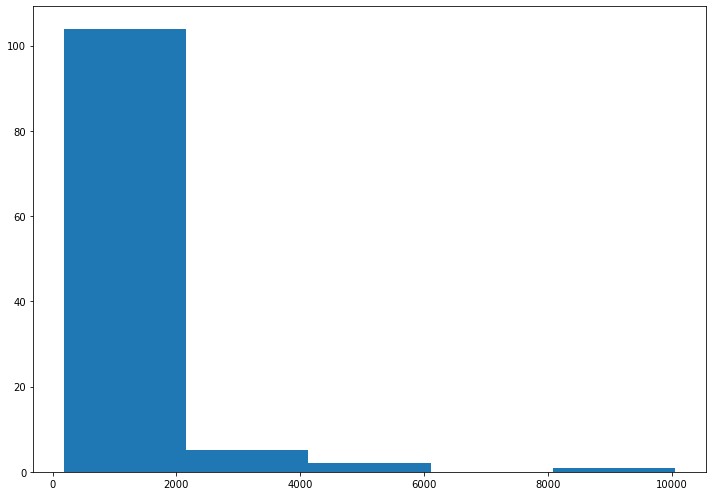

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

 
# Creating dataset
np.random.seed(23685752)
N_points = 10000
n_bins = 5
 
# Creating distribution
x = np.random.randn(N_points)
#y = .8 ** x + np.random.randn(10000) + 25
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(result['total'], bins = n_bins)
 
# Show plot
plt.show()

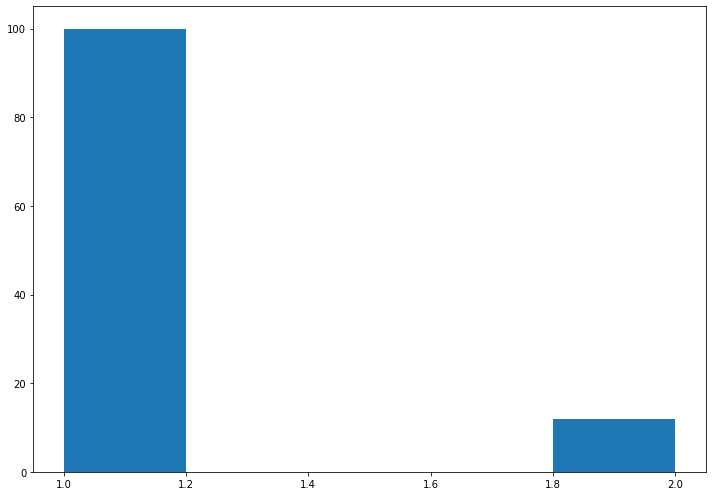

In [23]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

 
# Creating dataset
np.random.seed(23685752)
N_points = 10000
n_bins = 5
 
# Creating distribution
x = np.random.randn(N_points)
#y = .8 ** x + np.random.randn(10000) + 25
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(result['quantity'], bins = n_bins)
 
# Show plot
plt.show()

In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 1
['total']


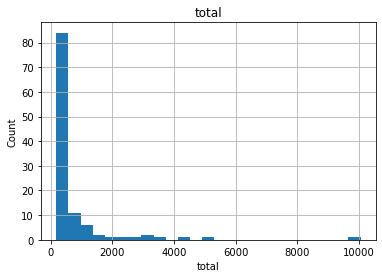

In [25]:
for feature in continuous_feature:
    data=result.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

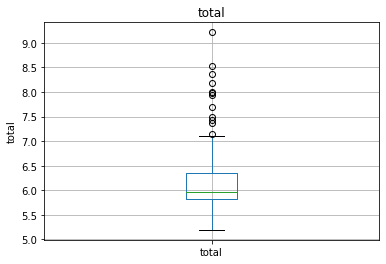

In [26]:
for feature in continuous_feature:
    data=result.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [27]:
categorical_features=[feature for feature in result.columns if result[feature].dtypes=='O']
categorical_features

['admin_reference',
 'subsite_store',
 'state',
 'payment_state',
 'shipment_state',
 'currency',
 'campaign_code',
 'bill_city',
 'bill_zipcode',
 'bill_company',
 'bill_country_iso_name',
 'ship_city',
 'ship_zipcode',
 'ship_company',
 'ship_country_iso_name',
 'product_name',
 'sku',
 'completed_at_y']

In [28]:
result[categorical_features].head()

,admin_reference,subsite_store,state,payment_state,shipment_state,currency,campaign_code,bill_city,bill_zipcode,bill_company,bill_country_iso_name,ship_city,ship_zipcode,ship_company,ship_country_iso_name,product_name,sku,completed_at_y
0,O727025761,NaN,complete,paid,shipped,SEK,NaN,Åsarp,52043,NaN,SE,Åsarp,52043,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,SÄL827025,2019-03-06 17:34
1,O862482170,NaN,complete,paid,shipped,SEK,NaN,Säffle,66140,NaN,SE,Säffle,66140,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,SÄL827025,2018-07-10 06:45
2,O691419618,NaN,complete,paid,shipped,SEK,NaN,Ellös,47432,NaN,SE,Ellös,47432,NaN,SE,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,SÄL827025,2018-06-01 13:00
3,O044950495,NaN,complete,paid,shipped,NOK,NaN,Vossestrand,5713,NaN,NO,Vossestrand,5713,NaN,NO,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,SÄL827025,2018-06-04 06:41
4,O123348012,NaN,complete,paid,shipped,NOK,NaN,Bru,4158,NaN,NO,Bru,4158,NaN,NO,SMAKIS ÄPPLE KRAV BRICK 25 cl - 27 st,SÄL827025,2018-06-11 17:41


In [29]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(result[feature].unique())))

The feature is admin_reference and number of categories are 112
The feature is subsite_store and number of categories are 3
The feature is state and number of categories are 1
The feature is payment_state and number of categories are 1
The feature is shipment_state and number of categories are 2
The feature is currency and number of categories are 3
The feature is campaign_code and number of categories are 2
The feature is bill_city and number of categories are 85
The feature is bill_zipcode and number of categories are 90
The feature is bill_company and number of categories are 1
The feature is bill_country_iso_name and number of categories are 3
The feature is ship_city and number of categories are 85
The feature is ship_zipcode and number of categories are 90
The feature is ship_company and number of categories are 1
The feature is ship_country_iso_name and number of categories are 3
The feature is product_name and number of categories are 1
The feature is sku and number of categori

In [30]:

#all Nun
#drop since number of categories are all Nun
#result['completed_at']
#result['customer_company']
#result['bill_state_name']
#result['ship_state_name']

pd.options.display.max_columns = None
pd.options.display.max_rows = None


#drop since number of categories are 1
result.drop('bill_company', inplace=True, axis=1)
result.drop('ship_company', inplace=True, axis=1)
result.drop('sku', inplace=True, axis=1)


#drop since number of categories 1
result.drop('state', inplace=True, axis=1)
#drop since number of categories 1
result.drop('payment_state', inplace=True, axis=1)
#rop since number of categories 1
result.drop('campaign_code', inplace=True, axis=1)
#drop since number of categories 1
result.drop('product_name', inplace=True, axis=1)



#['admin_reference' , '','','','bill_zipcode','']:
#unique number of order for traccking
result.drop('admin_reference', inplace=True, axis=1)    

#droup since all non
result.drop('bill_state_name', inplace=True, axis=1)  
result.drop('customer_company', inplace=True, axis=1)
result.drop('ship_state_name', inplace=True, axis=1)



In [31]:
result.head()

,subsite_store,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,ship_city,ship_zipcode,ship_country_iso_name,quantity,completed_at_y
0,NaN,shipped,456.00,SEK,Åsarp,52043,SE,Åsarp,52043,SE,1,2019-03-06 17:34
1,NaN,shipped,387.00,SEK,Säffle,66140,SE,Säffle,66140,SE,1,2018-07-10 06:45
2,NaN,shipped,4281.13,SEK,Ellös,47432,SE,Ellös,47432,SE,2,2018-06-01 13:00
3,NaN,shipped,333.00,NOK,Vossestrand,5713,NO,Vossestrand,5713,NO,1,2018-06-04 06:41
4,NaN,shipped,347.32,NOK,Bru,4158,NO,Bru,4158,NO,1,2018-06-11 17:41


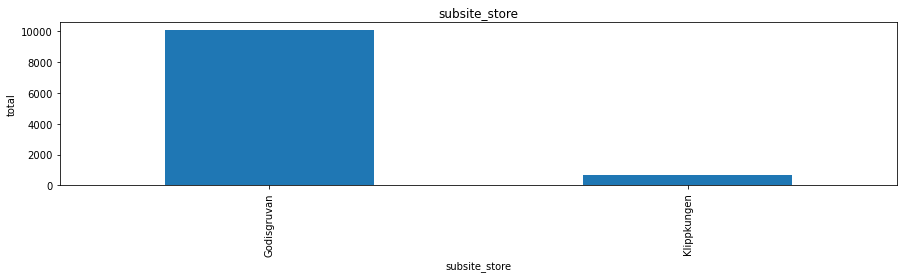

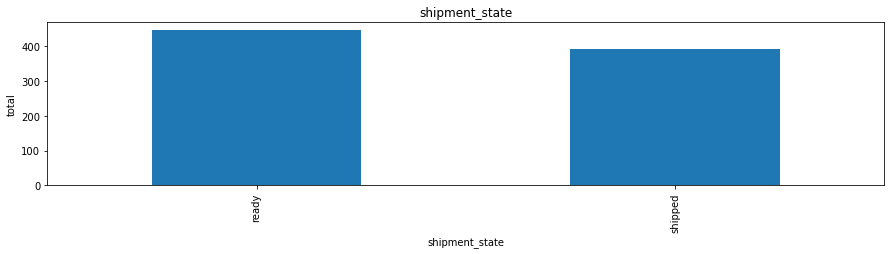

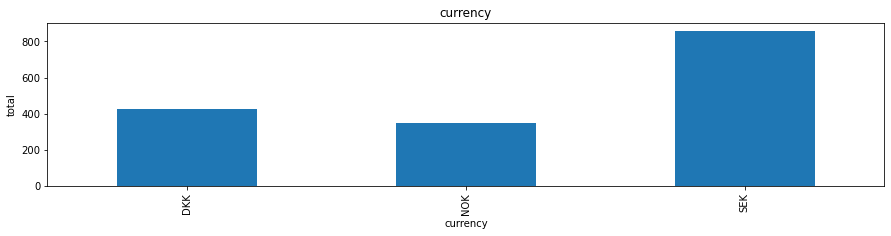

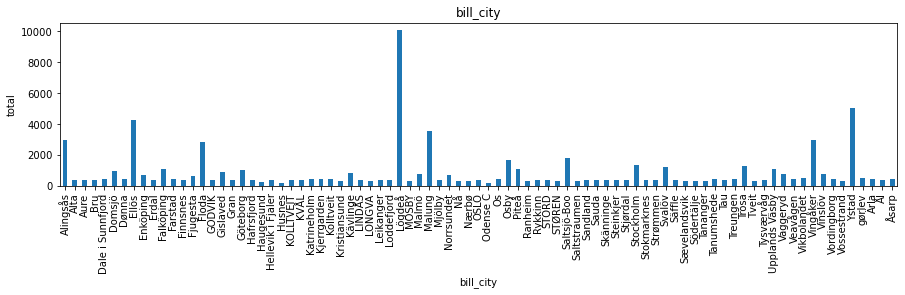

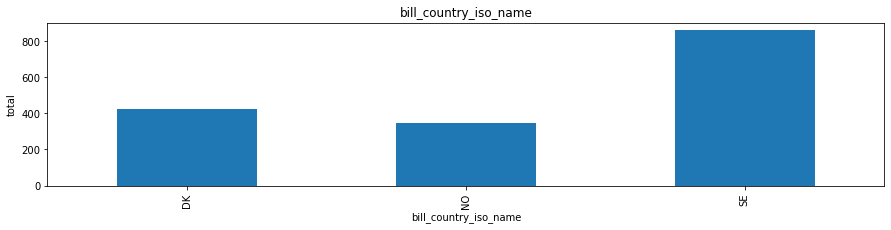

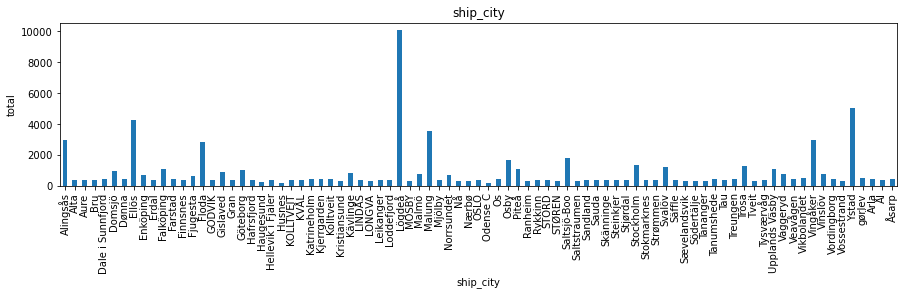

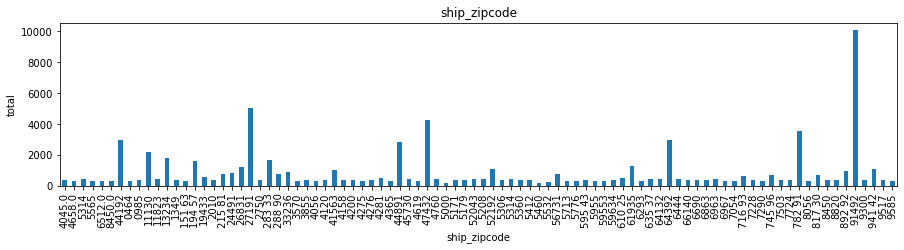

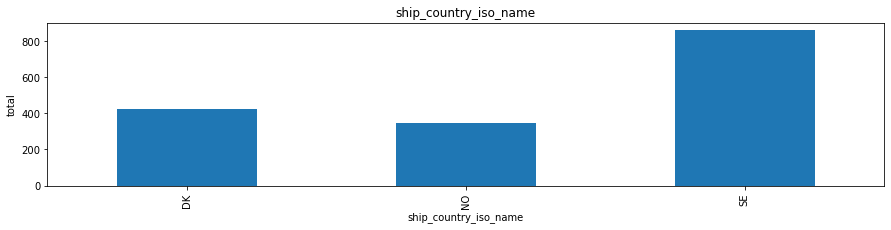

In [36]:
categorical_features=[feature for feature in result.columns if result[feature].dtypes=='O']
#categorical_features
for feature in categorical_features:
    if  feature in ['admin_reference' , 'state','payment_state','campaign_code','bill_zipcode','product_name']:
        continue
    data=result.copy()
    data.groupby(feature)['total'].median().plot.bar(figsize=(15,3))
    plt.xlabel(feature)
    plt.ylabel('total')
    plt.title(feature)
    plt.show()


In [37]:
result["completed_at_y"] = pd.to_datetime(result["completed_at_y"])
result["completed_year"]=result["completed_at_y"].dt.year
result["completed_month"]=result["completed_at_y"].dt.month
result["completed_day"]=result["completed_at_y"].dt.day

In [38]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [39]:
result = result.dropna(axis=0, subset=['completed_at_y'])

In [40]:
result.head()

,subsite_store,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,ship_city,ship_zipcode,ship_country_iso_name,quantity,completed_at_y,completed_year,completed_month,completed_day
0,NaN,shipped,456.00,SEK,Åsarp,52043,SE,Åsarp,52043,SE,1,2019-03-06 17:34:00,2019,3,6
1,NaN,shipped,387.00,SEK,Säffle,66140,SE,Säffle,66140,SE,1,2018-07-10 06:45:00,2018,7,10
2,NaN,shipped,4281.13,SEK,Ellös,47432,SE,Ellös,47432,SE,2,2018-06-01 13:00:00,2018,6,1
3,NaN,shipped,333.00,NOK,Vossestrand,5713,NO,Vossestrand,5713,NO,1,2018-06-04 06:41:00,2018,6,4
4,NaN,shipped,347.32,NOK,Bru,4158,NO,Bru,4158,NO,1,2018-06-11 17:41:00,2018,6,11


In [41]:
#result.drop('state', inplace=True, axis=1)
#result.drop('payment_state', inplace=True, axis=1)
#result.drop('campaign_code', inplace=True, axis=1)
#result.drop('product_name', inplace=True, axis=1)



In [42]:
#result.drop('admin_reference', inplace=True, axis=1)

In [43]:
result.drop('completed_at_y', inplace=True, axis=1)

In [44]:
#result.drop('bill_state_name', inplace=True, axis=1)

In [45]:
#bill_city corrleatin it same data

result.drop('ship_city', inplace=True, axis=1)
result.drop('ship_country_iso_name', inplace=True, axis=1)

In [46]:

result.drop('ship_zipcode', inplace=True, axis=1)

In [47]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df_result_imputed = result.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_result_imputed

,subsite_store,shipment_state,total,currency,bill_city,bill_zipcode,bill_country_iso_name,quantity,completed_year,completed_month,completed_day
0,Klippkungen,shipped,456.00,SEK,Åsarp,52043,SE,1,2019,3,6
1,Klippkungen,shipped,387.00,SEK,Säffle,66140,SE,1,2018,7,10
2,Klippkungen,shipped,4281.13,SEK,Ellös,47432,SE,2,2018,6,1
3,Klippkungen,shipped,333.00,NOK,Vossestrand,5713,NO,1,2018,6,4
4,Klippkungen,shipped,347.32,NOK,Bru,4158,NO,1,2018,6,11
5,Klippkungen,shipped,323.00,NOK,STØREN,7290,NO,1,2018,8,15
6,Klippkungen,shipped,347.00,NOK,OSLO,0985,NO,1,2018,6,5
7,Klippkungen,shipped,341.00,NOK,Ål,3570,NO,1,2018,6,6
8,Klippkungen,shipped,346.00,NOK,Gran,2750,NO,1,2018,9,5
9,Klippkungen,shipped,348.00,NOK,Finnsnes,9300,NO,1,2018,6,10


In [48]:
#result = result.dropna(axis=0, subset=['completed_at_y'])

In [49]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder

In [50]:


#encoder=TargetEncoder(cols='shipment_state') 
#encoder.fit_transform(df_result_imputed['shipment_state'],df_result_imputed['total'])


In [51]:
#CBE_encoder = CatBoostEncoder(cols='shipment_state')
#CBE_encoder.fit_transform(df_result_imputed['shipment_state'],df_result_imputed['total'])


In [52]:
import dtale

In [53]:
dtale.show(df_result_imputed)

In [57]:

# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'
df =df_result_imputed

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['completed_year'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['completed_year'])
chart_data = chart_data.rename(columns={'completed_year': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'total by completed_year'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'completed_year'}},
    'yaxis': {'title': {'text': 'total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [58]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['completed_month'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['completed_month'])
chart_data = chart_data.rename(columns={'completed_month': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'total by completed_month'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'completed_month'}},
    'yaxis': {'title': {'text': 'total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [59]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['completed_day'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['completed_day'])
chart_data = chart_data.rename(columns={'completed_day': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'total by completed_day'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'completed_day'}},
    'yaxis': {'title': {'text': 'total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)


In [60]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['completed_year'],
	df['quantity'],
], axis=1)
chart_data = chart_data.sort_values(['completed_year'])
chart_data = chart_data.rename(columns={'completed_year': 'x'})
chart_data_count = chart_data.groupby(['x'])[['quantity']].count()
chart_data_count.columns = ['quantity|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['quantity|count']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of quantity by completed_year'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'completed_year'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of quantity'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [62]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['completed_month'],
	df['quantity'],
], axis=1)
chart_data = chart_data.sort_values(['completed_month'])
chart_data = chart_data.rename(columns={'completed_month': 'x'})
chart_data_count = chart_data.groupby(['x'])[['quantity']].count()
chart_data_count.columns = ['quantity|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['quantity|count']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of quantity by completed_month'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'completed_month'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of quantity'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [63]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['completed_day'],
	df['quantity'],
], axis=1)
chart_data = chart_data.sort_values(['completed_day'])
chart_data = chart_data.rename(columns={'completed_day': 'x'})
chart_data_count = chart_data.groupby(['x'])[['quantity']].count()
chart_data_count.columns = ['quantity|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['quantity|count']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of quantity by completed_day'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'completed_day'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of quantity'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [64]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['subsite_store'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['subsite_store'])
chart_data = chart_data.rename(columns={'subsite_store': 'x'})
chart_data_count = chart_data.groupby(['x'])[['total']].count()
chart_data_count.columns = ['total|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total|count']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of total by subsite_store'},
    'xaxis': {'title': {'text': 'subsite_store'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [65]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['currency'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['currency'])
chart_data = chart_data.rename(columns={'currency': 'x'})
chart_data_count = chart_data.groupby(['x'])[['total']].count()
chart_data_count.columns = ['total|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total|count']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of total by currency'},
    'xaxis': {'title': {'text': 'currency'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [66]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['bill_city'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['bill_city'])
chart_data = chart_data.rename(columns={'bill_city': 'x'})
chart_data_count = chart_data.groupby(['x'])[['total']].count()
chart_data_count.columns = ['total|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total|count']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of total by bill_city'},
    'xaxis': {'title': {'text': 'bill_city'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/dash/dash.py", line 1336, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/Users/reenalboddul/miniforge3/envs/hl/lib

2021-10-28 14:43:35,218 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/dash/dash.py", line 1336, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/User

In [69]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

df =df_result_imputed
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

corr_cols = [
	'total', 'quantity', 'completed_year', 'completed_month', 'completed_day'
]
corr_data = df[corr_cols]
corr_data = np.corrcoef(corr_data.values, rowvar=False)
corr_data = pd.DataFrame(corr_data, columns=[corr_cols], index=[corr_cols])
corr_data.index.name = str('column')
corr_data = corr_data.reset_index()

corr_data

,level_0,total,quantity,completed_year,completed_month,completed_day
0,total,1.000000,0.577067,0.167194,-0.161055,0.139503
1,quantity,0.577067,1.000000,-0.022215,-0.040278,0.167092
2,completed_year,0.167194,-0.022215,1.000000,-0.419792,0.108409
3,completed_month,-0.161055,-0.040278,-0.419792,1.000000,-0.142306
4,completed_day,0.139503,0.167092,0.108409,-0.142306,1.000000


In [ ]:
total vs. quantity Pearson57.71%S pearman42.19%

In [70]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['shipment_state'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['shipment_state'])
chart_data = chart_data.rename(columns={'shipment_state': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'total by shipment_state'},
    'xaxis': {'title': {'text': 'shipment_state'}},
    'yaxis': {'title': {'text': 'total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


In [71]:
df =df_result_imputed
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['bill_country_iso_name'],
	df['total'],
], axis=1)
chart_data = chart_data.sort_values(['bill_country_iso_name'])
chart_data = chart_data.rename(columns={'bill_country_iso_name': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['total']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'total by bill_country_iso_name'},
    'xaxis': {'title': {'text': 'bill_country_iso_name'}},
    'yaxis': {'title': {'text': 'total'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
    iplot(figure)


Executing shutdown due to inactivity...


2021-10-28 16:44:58,881 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-10-28 16:44:58,991 - INFO     - Executing shutdown...
/Users/reenalboddul/miniforge3/envs/hl/lib/python3.8/site-packages/dtale/app.py:397: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df_result_imputed)
print(profile)
profile.to_file('profile_report.html')

In [ ]:
corr = result.corr()

In [ ]:
import seaborn as sns
sns.heatmap(corr)

In [ ]:
cor_matrix = result.corr().abs()
print(cor_matrix)

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in result.columns if result[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(result[feature].isnull().mean(), 4),' % missing values')